In [19]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

file_to_load= "../Project_1/employee_reviews.csv"
review_data= pd.read_csv(file_to_load)


In [20]:
review_data.head(1)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [21]:
company_summary_df=review_data.groupby(["company"]).agg({"company":["count"],"overall-ratings":["mean","median"]}).reset_index()
company_summary_df.columns = ["Company" , "#_of_reviews", "avg_rating","median_rating"]
company_summary_df

,Company,#_of_reviews,avg_rating,median_rating
0,amazon,26430,3.587363,4.0
1,apple,12950,3.958224,4.0
2,facebook,1590,4.511950,5.0
3,google,7819,4.339430,5.0
4,microsoft,17930,3.816564,4.0
5,netflix,810,3.411111,4.0


In [22]:
def time_convert(time):
    #if type(time) != 'str':
         #return(time)
    try:
        conv_time = time.replace(",","").strip()
        new_time = datetime.datetime.strptime(conv_time, '%b %d %Y').date()
    except:
        new_time = (np.NaN)
    return(new_time)
    
review_data['dates'] = review_data['dates'].apply(time_convert)


In [67]:
# Rename columns for merge-ability
review_data=review_data.rename(columns={"dates":"Date"})
review_data=review_data.sort_values(by='Date')


In [68]:
amazon_df=(review_data[review_data['company']=='amazon']).dropna()
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'],format=None)

apple_df=(review_data[review_data['company']=='apple']).dropna()
apple_df['Date'] = pd.to_datetime(apple_df['Date'],format=None)

facebook_df=(review_data[review_data['company']=='facebook']).dropna()
facebook_df['Date'] = pd.to_datetime(facebook_df['Date'],format=None)

google_df=(review_data[review_data['company']=='google']).dropna()
google_df['Date'] = pd.to_datetime(google_df['Date'],format=None)

microsoft_df=(review_data[review_data['company']=='microsoft']).dropna()
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'],format=None)



In [69]:
#Amazon stock data
AMZN_file= "../Project_1/worldtradingdata-history-AMZN.csv"
AMZN_df= pd.read_csv(AMZN_file)
AMZN_df['Date'] = pd.to_datetime(AMZN_df['Date'],format=None)

#merged data
Amazon_AMZN=pd.merge(amazon_df, AMZN_df, how='left', on ='Date')
Amazon_AMZN.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Amazon_AMZN=Amazon_AMZN.rename(columns={"Close":"Stock-at-close"})
(Amazon_AMZN.dropna()).head()

,Unnamed: 0,company,Date,overall-ratings,Stock-at-close
0,25342,amazon,2008-04-22,2.0,79.60
1,25343,amazon,2008-04-22,3.0,79.60
2,25344,amazon,2008-04-23,2.0,81.00
3,25341,amazon,2008-05-02,2.0,77.31
4,25340,amazon,2008-05-23,3.0,78.35


In [70]:
#Apple stock data
AAPL_file= "../Project_1/worldtradingdata-history-AAPL.csv"
AAPL_df= pd.read_csv(AAPL_file)
AAPL_df['Date'] = pd.to_datetime(AAPL_df['Date'],format=None)

#merged data
Apple_AAPL=pd.merge(apple_df, AAPL_df, how='left', on ='Date')
Apple_AAPL.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Apple_AAPL=Apple_AAPL.rename(columns={"Close":"Stock-at-close"})
(Apple_AAPL.dropna()).head()


,Unnamed: 0,company,Date,overall-ratings,Stock-at-close
0,46760,apple,2008-01-31,5.0,19.34
1,46759,apple,2008-02-14,4.0,18.21
2,46758,apple,2008-02-15,5.0,17.80
10,46745,apple,2008-04-21,5.0,24.02
11,46750,apple,2008-04-21,5.0,24.02


In [71]:
#FB stock data
FB_file= "../Project_1/worldtradingdata-history-FB.csv"
FB_df= pd.read_csv(FB_file)
FB_df['Date'] = pd.to_datetime(FB_df['Date'],format=None)

#merged data
Facebook_FB=pd.merge(facebook_df, FB_df, how='left', on ='Date')
Facebook_FB.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Facebook_FB=Facebook_FB.rename(columns={"Close":"Stock-at-close"})
(Facebook_FB.dropna()).head()


,Unnamed: 0,company,Date,overall-ratings,Stock-at-close
96,35407,facebook,2012-05-23,4.0,32.00
97,35406,facebook,2012-05-25,5.0,31.91
98,35405,facebook,2012-05-31,5.0,29.60
100,35404,facebook,2012-06-07,5.0,26.31
102,35838,facebook,2012-06-20,5.0,31.60


In [72]:
#Microsoft stock data
MSFT_file= "../Project_1/worldtradingdata-history-MSFT.csv"
MSFT_df= pd.read_csv(MSFT_file)
MSFT_df['Date'] = pd.to_datetime(MSFT_df['Date'],format=None)

#merged data
Microsoft_MSFT=pd.merge(microsoft_df, MSFT_df, how='left', on ='Date')
Microsoft_MSFT.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Microsoft_MSFT=Microsoft_MSFT.rename(columns={"Close":"Stock-at-close"})
(Microsoft_MSFT.dropna()).head()


,Unnamed: 0,company,Date,overall-ratings,Stock-at-close
0,61902,microsoft,2008-02-27,5.0,28.26
1,61901,microsoft,2008-02-27,5.0,28.26
2,61899,microsoft,2008-03-24,5.0,29.17
3,61900,microsoft,2008-04-03,3.0,29.00
4,61898,microsoft,2008-04-16,4.0,28.95


In [73]:
#Google stock data
GOOG_file= "../Project_1/worldtradingdata-history-GOOG.csv"
GOOG_df= pd.read_csv(GOOG_file)
GOOG_df['Date'] = pd.to_datetime(GOOG_df['Date'],format=None)

#merged data
Google_GOOG=pd.merge(google_df, GOOG_df, how='left', on ='Date')
Google_GOOG.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Google_GOOG=Google_GOOG.rename(columns={"Close":"Stock-at-close"})
(Google_GOOG.dropna()).head()

,Unnamed: 0,company,Date,overall-ratings,Stock-at-close
0,4932,google,2008-02-05,4.0,253.39
1,4929,google,2008-02-11,5.0,260.57
2,4931,google,2008-02-14,3.0,266.12
3,4928,google,2008-02-14,5.0,266.12
4,4926,google,2008-02-25,5.0,243.22


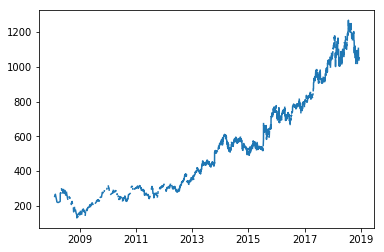

In [74]:
#plt.scatter(Google_GOOG['Date'], Google_GOOG['Stock-at-close'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
stock_x = Google_GOOG['Date']
stock_y = Google_GOOG['Stock-at-close']
plt.plot(stock_x, stock_y)
plt.show()

TypeError: invalid type promotion

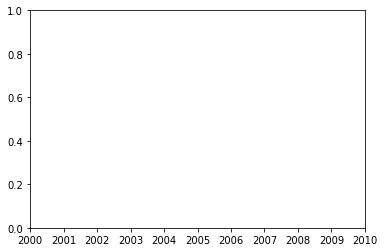

In [78]:
star_x=Google_GOOG['Date']
star_y = Google_GOOG['overall-ratings']
plt.scatter(star_x, star_y, marker='o',color='black')
plt.show()